In [2]:
import sqc
import numpy as np
from exercises import qft
import matplotlib.pyplot as plt

In [27]:
# Create noise model for a typical 2019 quantum computer (taken from ibmqx4)
nm2019=sqc.noise.model.simple(
    T1 = 40,
    gate_times = { "H" : 0.5, "CNOT" : 1.0, "Rz" : 0.0, "X": 0.5 },
    qubit_readout_errors = [ 0.043, 0.073, 0.184, 0.35, 0.26 ],
    gate_depolarization_p = { "X" : 0.005, "CNOT" : 0.05, "Rz" : 0.0, "H" : 0.005 }
)

# Phase estimation

In [29]:
def phaseEstimate(op,xbits,cuj):
    N=len(xbits)
    for i in reversed(range(N)):
        op=op.H(xbits[i])
        op=cuj(xbits[i],2**i,op)
    op=qft(op,mask=xbits,inverse=True)
    return op

# Simple U = {{ Exp[I 2pi phi], 0}, { 0, Exp[-I 2pi phi] }}, always acting on LSB
def CU(i,k,op,phi): # i is control qubit, k is power
    return op.Rz(0,2.*np.pi*phi*k).CNOT(i,0).Rz(0,-2.*np.pi*phi*k).CNOT(i,0)

def measure(nm,Nxbits,Nmeasure,cuj):
    Nbits=Nxbits+1
    xbits=list(range(1,Nbits))
    
    st0=sqc.state(Nbits,basis=["|%g>|%d>" % ( (i//2) / 2**Nxbits,i%2) for i in range(2**Nbits)])
    print("Initial = 0\n",st0)

    op=phaseEstimate(sqc.operator(Nbits).H(0),xbits,cuj)

    print(len(op.m),"gates")
    
    #print(op.toQASM())
    if Nmeasure == 0:
        print("State after phaseEstimate\n",st1)
    else:
        res=sqc.noise.sample(nm,op,st0,Nmeasure,mask=xbits)
        
        plt.bar([ x / 2**Nxbits for x in res.keys() ],res.values(),width=0.01)
        plt.xlabel('phi')
        plt.xlim(0,1)
        plt.ylabel('count')
        plt.show()
        
        print(res)
        
    


Initial = 0
    1 * |0>|0>
61 gates


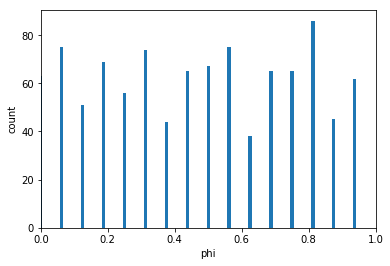

{6: 44, 1: 75, 12: 65, 4: 56, 0: 63, 3: 69, 11: 65, 5: 74, 13: 86, 7: 65, 9: 75, 14: 45, 2: 51, 8: 67, 15: 62, 10: 38}


In [30]:
measure(nm2019,4,1000,lambda i,k,op: CU(i,k,op,0.3))

Initial = 0
    1 * |0>|0>
61 gates


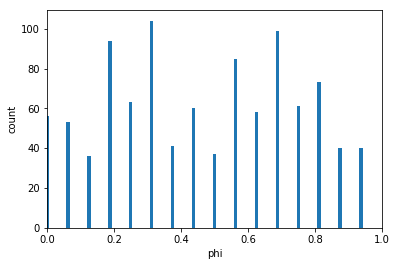

{13: 73, 1: 53, 9: 85, 15: 40, 6: 41, 8: 37, 5: 104, 12: 61, 11: 99, 7: 60, 3: 94, 0: 56, 4: 63, 10: 58, 2: 36, 14: 40}


In [31]:
# Divide readout errors by 10
nm2019div10ro=sqc.noise.model.simple(
    T1 = 40,
    gate_times = { "H" : 0.5, "CNOT" : 1.0, "Rz" : 0.0, "X": 0.5 },
    qubit_readout_errors = [ 0.0043, 0.0073, 0.0184, 0.035, 0.026 ],
    gate_depolarization_p = { "X" : 0.005, "CNOT" : 0.05, "Rz" : 0.0, "H" : 0.005 }
)

measure(nm2019div10ro,4,1000,lambda i,k,op: CU(i,k,op,0.3))

Initial = 0
    1 * |0>|0>
61 gates


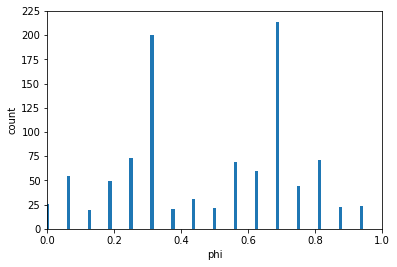

{4: 73, 11: 214, 0: 26, 3: 49, 9: 69, 13: 71, 1: 55, 15: 24, 7: 31, 5: 200, 14: 23, 2: 19, 12: 44, 10: 60, 8: 22, 6: 20}


In [32]:
# Divide readout errors and gate errors by 10
nm2019div10rog=sqc.noise.model.simple(
    T1 = 40,
    gate_times = { "H" : 0.5, "CNOT" : 1.0, "Rz" : 0.0, "X": 0.5 },
    qubit_readout_errors = [ 0.0043, 0.0073, 0.0184, 0.035, 0.026 ],
    gate_depolarization_p = { "X" : 0.0005, "CNOT" : 0.005, "Rz" : 0.0, "H" : 0.0005 }
)

measure(nm2019div10rog,4,1000,lambda i,k,op: CU(i,k,op,0.3))